In [7]:
# Step 1: Import necessary packages for linear regression
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
import pandas as pd

sns.set_style(style='whitegrid')
plt.rcParams['patch.force_edgecolor'] = True

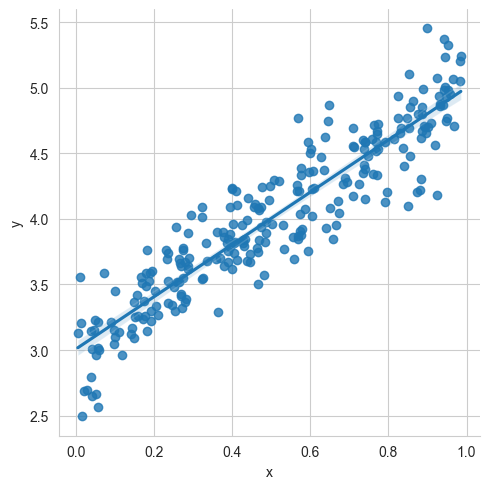

In [8]:
# Step 2 : Create a single training set with the available data set
aa = 2
bb = 3
x = np.random.rand(256)

noise = np.random.randn(256) / 4

y = aa * x + bb + noise

df = pd.DataFrame()
df['x'] = x
df['y'] = y

sns.lmplot(x='x', y='y', data=df)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


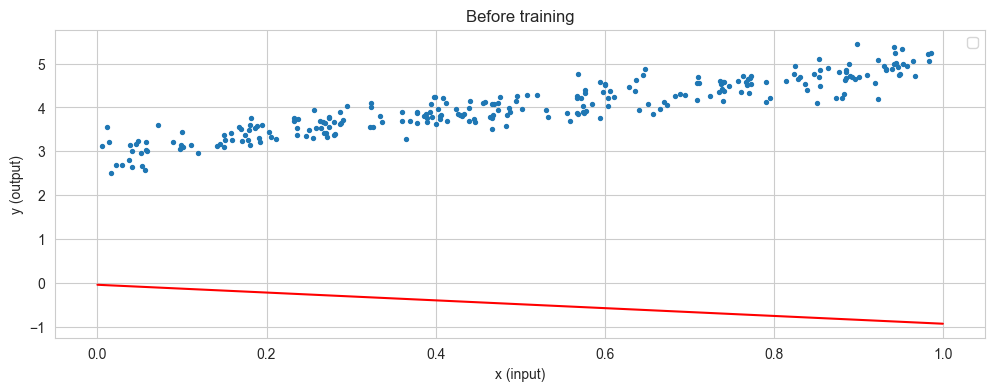

In [14]:
# Step 3 : Implement linear regression with PyTorch libraries
import torch
import torch.nn as nn
from torch.autograd import Variable

x_train = x.reshape(-1, 1).astype('float32')
y_train = y.reshape(-1, 1).astype('float32')

class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim) -> None:
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out
    
input_dim = x_train.shape[1]
output_dim = y_train.shape[1]

model = LinearRegressionModel(input_dim, output_dim)
criterion = nn.MSELoss()
[a, b] = model.parameters()

def get_param_values():
    return a.data[0][0], b.data[0]

def plot_current_fit(title = ''):
    plt.figure(figsize=(12, 4))
    plt.title(title)
    plt.scatter(x, y, s=8)
    a1 = a.data[0][0]
    b1 = b.data[0]
    x1 = np.array([0., 1.])
    y1 = a1 * x1 + b1
    plt.plot(x1, y1, 'r')
    plt.xlabel('x (input)')
    plt.ylabel('y (output)')
    plt.legend()
    plt.show()

plot_current_fit('Before training')